# **Lab 1**
Name: Bilal Ahmed

Student ID: 500968598

**Loading Data**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print (data)

m = -0.5
b = 0
x = np.linspace(25,71,100)
y = m*x+b

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]


**Calculations: Mean & Standard Deviation**

In [15]:
#Midterm Calculations
mean_midterm = data ['Midterm mark'].mean()
std_dev_midterm = data ['Midterm mark'].std()

#Final Calculations
mean_final = data ['Final mark'].mean()
std_dev_final = data ['Final mark'].std()

print("Midterm Mean: ",mean_midterm)
print("Midterm Standard Deviation: ",std_dev_midterm)
print("\n")
print("Final Mean: ",mean_final)
print("Final Standard Deviation: ",std_dev_final)


Midterm Mean:  48.959
Midterm Standard Deviation:  9.746494785617061


Final Mean:  72.735
Final Standard Deviation:  16.658248631676365


**Standardization**

In [16]:
x_standardized = (data['Midterm mark'] - mean_midterm)/std_dev_midterm
y_standardized = (data['Final mark'] - mean_final)/std_dev_final

print(x_standardized)
print("\n")
print(y_standardized)

0    -1.688710
1     0.455651
2     1.286719
3    -0.149695
4     1.112297
        ...   
95    0.106808
96    0.024727
97    0.106808
98   -0.088134
99   -2.447957
Name: Midterm mark, Length: 100, dtype: float64


0    -2.463344
1    -0.236219
2    -0.608407
3    -0.074137
4     0.868339
        ...   
95    0.526166
96   -0.038119
97    0.748278
98   -0.392298
99   -1.154683
Name: Final mark, Length: 100, dtype: float64


**Error (Cost Function)**

In [17]:
#Calculates the mean squared error between the true values and the predicted values.
def mean_squared_error(y_true, y_predicted):

  mse = np.mean((y_true - y_predicted)**2)
  return mse

y_true = y_standardized
y_predicted = m * x_standardized + b

mse = mean_squared_error(y_true, y_predicted)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.0032433621324923


**Gradient Partial Derivatives**

In [18]:
dm = (2 / len(x_standardized)) * np.sum((y_predicted - y_standardized) * x_standardized)
db = (2 / len(x_standardized)) * np.sum((y_predicted - y_standardized))

print("Partial Derivative (m):", dm)
print("Partial Derivative (b):", db)


Partial Derivative (m): -2.521486724264985
Partial Derivative (b): 2.486899575160351e-16


**Updating m and b using**

In [19]:
alpha = 0.0001  # Learning rate

# Updating values using learning rate
m = m - alpha * dm
b = b - alpha * db

print("m - Updated:", m)
print("b - Updated:", b)

m - Updated: -0.4997478513275735
b - Updated: -2.486899575160351e-20


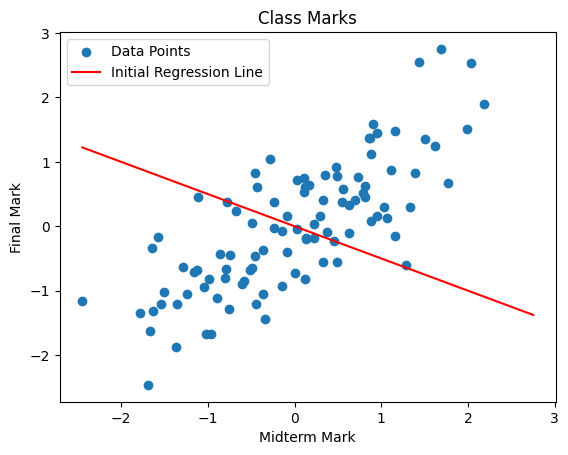

In [20]:
plt.scatter(x_standardized, y_standardized, label='Data Points')

x = np.linspace(min(x_standardized), max(y_standardized), 100)
y = -0.5 * x

plt.plot(x, y, color='red', label='Initial Regression Line')

plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.title('Class Marks')
plt.legend()
plt.show()

The initial regression line, with parameters m=-0.5, b=0, and alpha = 0.0001, clearly indicates that it is not suitable for accurately modeling the data.

**Updating m and b (100 iterations):**

Updated m: -0.4503085663186879
Updated b: -4.951594689828198e-18


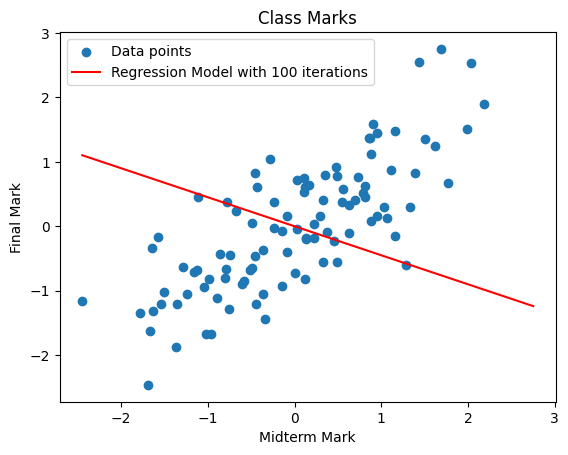

In [22]:
#number of iterations
num_iterations = 100
#gradient descent algorithm loop
for _ in range(num_iterations):
    #Predicted value calculations
    y_predicted = m * x_standardized + b

    dm = (2 / len(x_standardized)) * np.sum((y_predicted - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum((y_predicted - y_standardized))

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(x_standardized, y_standardized, label = 'Data points')
x = np.linspace(min(x_standardized), max(y_standardized), 100)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Regression Model with 100 iterations')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Class Marks')
plt.legend()
plt.show()

Minimal changes can be seen even after 100 alterations

**Error at each iteration after 100 iterations**

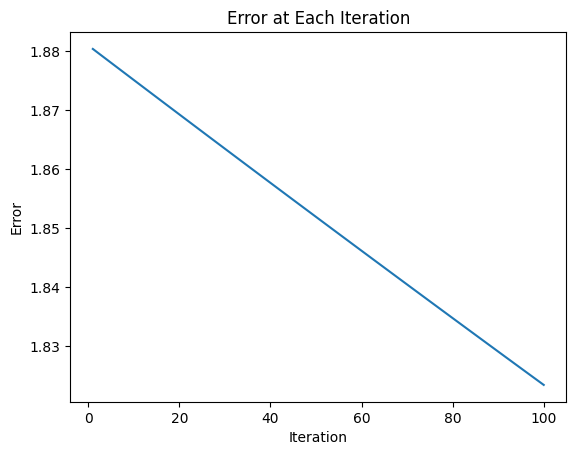

In [23]:
errors = []

for iteration in range(num_iterations):
    y_predicted = m * x_standardized + b

    error = np.mean((y_predicted - y_standardized) ** 2)
    errors.append(error)

    dm = (2 / len(x_standardized)) * np.sum((y_predicted - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum(y_predicted - y_standardized)

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

The relationship between error and iterations is proportional, with the error decreasing as the number of iterations increases. Initially starting at 1.94 during initialization, the error reduces to 1.88 after 100 iterations.

**2000 iterations**

Updated m: -0.033958039425177874
Updated b: -2.104760810084372e-17


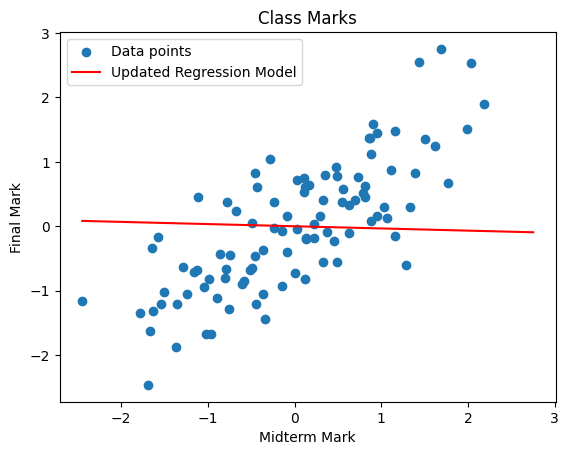

In [24]:
#number of iteration
num_iterations = 2000
#gradient descent algorithm loop
for _ in range(num_iterations):
    y_predicted = m * x_standardized + b

    dm = (2 / len(x_standardized)) * np.sum((y_predicted - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum(y_predicted - y_standardized)

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(x_standardized, y_standardized, label = 'Data points')
x = np.linspace(min(x_standardized), max(y_standardized), 2000)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Updated Regression Model')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Class Marks')
plt.legend()
plt.show()

After 2000 iterations, the regression model becomes overfit and lacks precision in forecasting future final marks based on midterm scores.

**Error for 2000 iterations**

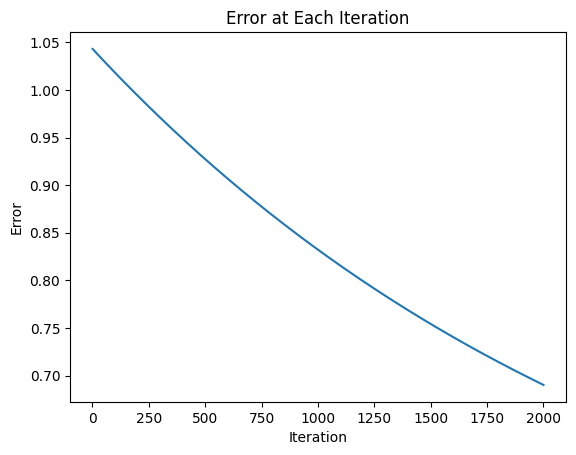

In [25]:
errors = []

for iteration in range(num_iterations):
    y_predicted = m * x_standardized + b

    error = np.mean((y_predicted - y_standardized) ** 2)
    errors.append(error)

    dm = (2 / len(x_standardized)) * np.sum((y_predicted - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum(y_predicted - y_standardized)

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

The error exhibits a declining pattern over 2000 iterations, beginning at 1.05 and concluding at 0.70 by the end of the 2000th iteration.

### **Linear Regression using Non-Standardized Data**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print (data)

m = -0.5
b = 0
x = np.linspace(25,71,100)
y = m*x+b

midterm_marks = data['Midterm mark']
final_marks = data['Final mark']

#Midterm Calculations
mean_midterm = data ['Midterm mark'].mean()
std_dev_midterm = data ['Midterm mark'].std()

#Final Calculations
mean_final = data ['Final mark'].mean()
std_dev_final = data ['Final mark'].std()

print("Midterm Mean: ",mean_midterm)
print("Midterm Standard Deviation: ",std_dev_midterm)
print("\n")
print("Final Mean: ",mean_final)
print("Final Standard Deviation: ",std_dev_final)


    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]
Midterm Mean:  48.959
Midterm Standard Deviation:  9.746494785617061


Final Mean:  72.735
Final Standard Deviation:  16.658248631676365


**Error (Cost Function)**

In [27]:
def mean_squared_error(y_true, y_pred):

    mse = np.mean((y_true - y_pred) ** 2)
    return mse

y_true = final_marks
y_predicted = m * midterm_marks + b

mse = mean_squared_error(y_true, y_predicted)
print("Mean Squared Error:", mse)

Mean Squared Error: 9873.218075


**Gradient Partial Derivative**

In [28]:
dm = (2 / len(midterm_marks)) * np.sum((y_predicted - final_marks) * midterm_marks)
db = (2 / len(midterm_marks)) * np.sum((y_predicted - final_marks))

print("Partial Derivative (m):", dm)
print("Partial Derivative (b):", db)

Partial Derivative (m): -9861.7451
Partial Derivative (b): -194.42900000000003


**Updating m and b (100) iterations**

Updated m: 1.4785727560143909
Updated b: 0.04490536397288713


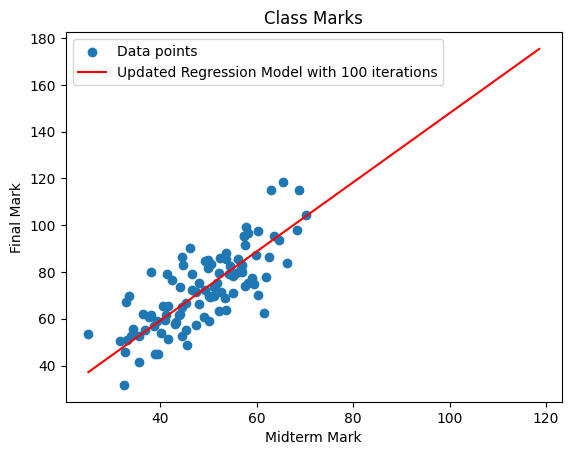

In [32]:
#number of iteration
num_iterations = 100
#gradient descent algorithm loop
for _ in range(num_iterations):

  y_predicted = m * midterm_marks + b

  dm = (2 / len(midterm_marks)) * np.sum((y_predicted - final_marks) * midterm_marks)
  db = (2 / len(midterm_marks)) * np.sum((y_predicted - final_marks))

  m = m - alpha * dm
  b = b - alpha * db

plt.scatter(midterm_marks, final_marks, label = 'Data points')
x = np.linspace(min(midterm_marks), max(final_marks), 100)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Updated Regression Model with 100 iterations')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Class Marks')
plt.legend()
plt.show()

The non-standardized data aligns quite well with the regression model.

**Error for 100 Iterations**

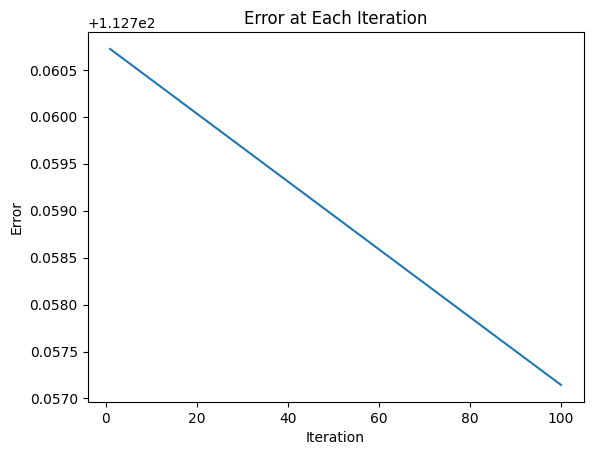

In [33]:
errors = []

for iteration in range(num_iterations):
    y_predicted = m * midterm_marks + b

    error = np.mean((y_predicted - final_marks) ** 2)
    errors.append(error)

    dm = (2 / len(midterm_marks)) * np.sum((y_predicted - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_predicted - final_marks)

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

The error decreases significantly with each iteration in the non-standardized model. Starting at 0.0605 during initialization, it diminishes to 0.0570 by the 100th iteration.

**Updating m and b (2000 iterations)**

Updated m: 1.4761104789527106
Updated b: 0.17018382013596003


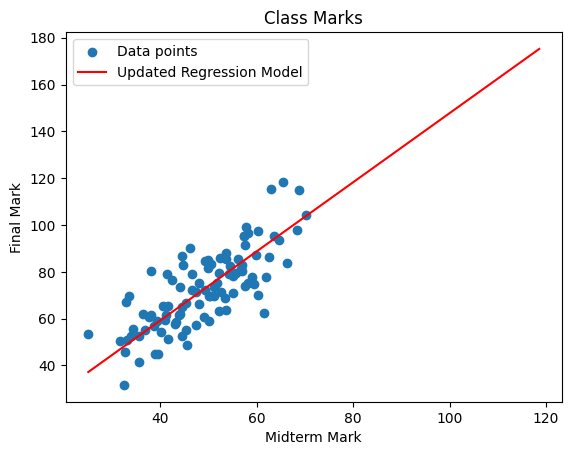

In [34]:
#number of iteration
num_iterations = 2000
#gradient descent algorithm loop
for _ in range(num_iterations):
    y_predicted = m * midterm_marks + b

    dm = (2 / len(midterm_marks)) * np.sum((y_predicted - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_predicted - final_marks)

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(midterm_marks, final_marks, label = 'Data points')
x = np.linspace(min(midterm_marks), max(final_marks), 2000)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Updated Regression Model')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Class Marks')
plt.legend()
plt.show()

**Error for 2000 iterations**

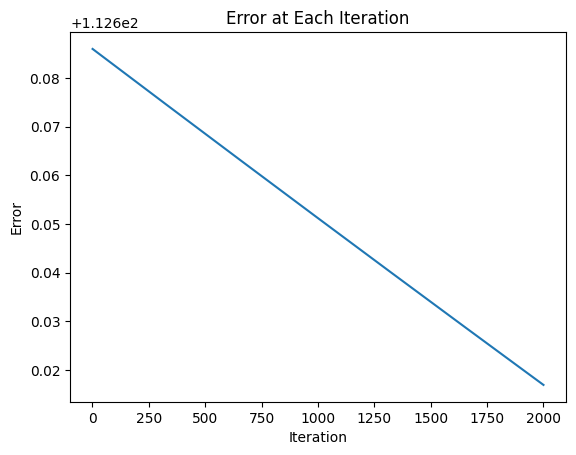

In [35]:
errors = []

for iteration in range(num_iterations):
    y_predicted = m * midterm_marks + b

    error = np.mean((y_predicted - final_marks) ** 2)
    errors.append(error)

    dm = (2 / len(midterm_marks)) * np.sum((y_predicted - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_predicted - final_marks)

    m = m - alpha * dm
    b = b - alpha * db

plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

# **Verification using scikit library**

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")

x = data[['Midterm mark']].values.reshape(-1,1)
y = data['Final mark']

mean_midterm = np.mean(x)
mean_final = np.mean(y)

std_dev_mid = np.std(x)
std_dev_final = np.std(y)

x_standardized = (x - mean_midterm)/std_dev_mid
y_standardized = (y - mean_final)/std_dev_final

reg_std = LinearRegression()
reg_nonstd = LinearRegression()

reg_std.fit(x_standardized, y_standardized)
reg_nonstd.fit(x, y)

m_std = reg_std.coef_[0]
b_std = reg_std.intercept_
m_nonstd = reg_nonstd.coef_[0]
b_nonstd = reg_nonstd.intercept_

print("Standardized data: m =", m_std, "b =", b_std)
print("Non-standardized data: m =", m_nonstd, "b =", b_nonstd)

Standardized data: m = 0.7734781435681737 b = 2.5515431945611573e-16
Non-standardized data: m = 1.321992317252377 b = 8.01157813964086
